**API Command: kaggle datasets download -https://www.kaggle.com/datasets/ammaraahmad/used-cars-dataset**

*Introduction*: The Data available contains several information about cars: 'number-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg' etc.The data set can be used for different purposes by different companies to define the price of sale for similar cars in a secondary market. Nowadays whenever we decide to buy or sell a car online there is a handfull of information available about the upper and lower limit we may charge depending on the characteristics of the car. This is the type of dataset used to calculate these limits.

*Process/Approach*: Check the Data Set and discover its main characteristics.  Start basic analysis and adjust rows or columns to our main goal. Define the dependent and independent variables that will be used in a model. Prepare a graphical overview to confirm some insights about the data. Build a linear model with the available that and validate its usability (how much the model explains, errors metrics, multicolinearity, p-values).

*Conclusion*: Conclude the model with a formula able to predict the dependent variable with a high level of accuracy and test it on a secondary data set (test set).

## Import Libraries

In [1]:
# Import necessary libraries.
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline


<font color=darkblue>
    
# Loading and exploring the data


In [2]:
df = pd.read_csv("usedcars.csv")  

In [3]:
df.shape #The File has 201 Rows with Data AND 33 Columns

(201, 33)

In [4]:
len(df) # confirm the number of rows

201

In [5]:
df.columns #The Columns names are described as below. Names are very long but will remain for this exercise.

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'price_binned', 'diesel', 'gas',
       'normalized_length', 'normalized_width', 'normalized_height'],
      dtype='object')

In [6]:
df.sample(10) 
#Below is an overview of 10 rows rondomly selected. Showing the content and some characteristics of each variable.

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,price_binned,diesel,gas,normalized_length,normalized_width,normalized_height
33,1,101.0,honda,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1956,ohc,four,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129,7.833333,6.911765,Low,0,1,-1.964020,-0.898920,-0.476614
19,0,81.0,chevrolet,std,four,sedan,fwd,front,94.5,158.8,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,6575,6.184211,5.465116,Low,0,1,-1.249860,-1.089263,-0.721730
120,-1,74.0,plymouth,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,four,122,2bbl,3.35,3.46,8.5,88.0,5000.0,24,30,8921,9.791667,7.833333,Low,0,1,0.032381,-0.613406,2.464776
121,3,NaN,plymouth,turbo,two,hatchback,rwd,front,95.9,173.2,66.3,50.2,2818,ohc,four,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,12764,12.368421,9.791667,Low,0,1,-0.081235,0.195551,-1.457078
49,1,104.0,mazda,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1905,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6795,7.580645,6.184211,Low,0,1,-1.225514,-0.803749,0.136175
149,0,77.0,toyota,std,four,wagon,fwd,front,95.7,169.7,63.6,59.1,2280,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,31,37,6918,7.580645,6.351351,Low,0,1,-0.365276,-1.089263,2.178808
21,1,118.0,dodge,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6377,7.580645,6.184211,Low,0,1,-1.371592,-0.994092,-1.211962
184,2,94.0,volkswagen,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2300,ohc,four,109,mpfi,3.19,3.40,10.0,100.0,5500.0,26,32,9995,9.038462,7.343750,Low,0,1,-0.202967,-0.185134,0.789818
139,0,102.0,subaru,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2340,ohcf,four,108,mpfi,3.62,2.64,9.0,94.0,5200.0,26,32,9960,9.038462,7.343750,Low,0,1,-0.178621,-0.232720,-0.517467
193,-1,74.0,volvo,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,16515,9.791667,8.392857,Low,0,1,1.184775,0.623823,1.525165


In [7]:
df.info()
# The File includes categorical (object)  and numerical values (int & float).
# The Information showing Non-null Count is a reference to missing values on the columns. 
# Missing values not always come as NAN, but can be hidden in different forms in a data set, therefore additional analysis may be required.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       199 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [8]:
df.isnull().sum() 
# Another way to check for missing values

symboling             0
normalized-losses    37
make                  0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
city-L/100km          0
highway-L/100km       0
price_binned          0
diesel                0
gas                   0
normalized_length     0
normalized_width      0
normalized_height     0
dtype: int64

I am not an specialist in cars or characteristics of cars, though it is necessary to start making decisions about the dataset and what is usefull for the analysis. At this point it is clear that some columns have a high multicolinearity, which means they tell the same story, therefore the used of two or three columns with the same meaning will only create more noisy to the model, without any additional benefit to the output (conclusion).

Furthermore, some variables do not see to have a high significance on explaining anything related to the cars. Therefore they can be dropped.

Dealing with missing values is also a very important decision, specially if they are numerous. In our dataset this is not the case and a simple solution for the missing values is to drop them, because they are very few in numbers.

Decisions:
- Drop the columns 'normalized_length','normalized_width','normalized_height' because they do not provide additional value to the dataset than columns 'length', 'width', 'height'
- Drop the column 'normalized-losses' since there is a reasonable number of missing values and no explanation of what this variable mean to explain
- Drop the column 'symboling' also no information on what this variable mean to explain
- Price binned will also be drop, because there is already a column with the real price of the car and this will provide more accuracy to our analysis.

In [9]:
# drop the columns
df = df.drop(['normalized-losses', 'symboling', 'normalized_length','normalized_width','normalized_height','price_binned'], axis=1)

In [10]:
# drop the missing values
df =df.dropna()

In [11]:
#checking againg for missing values
df.isnull().sum() 

make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
highway-L/100km      0
diesel               0
gas                  0
dtype: int64

In [12]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows_df.shape))
df = df.drop_duplicates()

number of duplicate rows: (0, 27)


In [13]:
df.describe().T
#These are the statistical values for numerical columns. 
# We can see the mean,standard deviation, minimum, maximum as well as first, second and third quantiles.
# When mean and 50% are close to each other, most of the data is concentrated around this value. If they are close to each other, the data has a high dispersion. 

,count,mean,std,min,25%,50%,75%,max
wheel-base,193.0,98.923834,6.152409,86.600000,94.500000,97.000000,102.400000,120.900000
length,193.0,174.326425,12.478593,141.100000,166.300000,173.200000,184.600000,208.100000
width,193.0,65.893782,2.137795,60.300000,64.100000,65.400000,66.900000,72.000000
height,193.0,53.869948,2.394770,47.800000,52.000000,54.100000,55.700000,59.800000
curb-weight,193.0,2561.507772,526.700026,1488.000000,2145.000000,2414.000000,2952.000000,4066.000000
engine-size,193.0,128.124352,41.590452,61.000000,98.000000,120.000000,146.000000,326.000000
bore,193.0,3.330622,0.272385,2.540000,3.150000,3.310000,3.590000,3.940000
stroke,193.0,3.248860,0.315421,2.070000,3.110000,3.290000,3.410000,4.170000
compression-ratio,193.0,10.143627,3.977491,7.000000,8.500000,9.000000,9.400000,23.000000
horsepower,193.0,103.481865,37.960107,48.000000,70.000000,95.000000,116.000000,262.000000


In [14]:
df["make"].nunique()

21

In [15]:
num_to_display = 10  # defining this up here so it's easy to change later
for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # Will also show the NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n\n")  # just for more space in between

toyota        32
nissan        18
honda         13
mitsubishi    13
mazda         12
subaru        12
volkswagen    12
volvo         11
peugot        11
dodge          8
Name: make, dtype: int64
Only displaying first 10 of 21 values.



std      158
turbo     35
Name: aspiration, dtype: int64



four    112
two      81
Name: num-of-doors, dtype: int64



sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64



fwd    114
rwd     71
4wd      8
Name: drive-wheels, dtype: int64



front    190
rear       3
Name: engine-location, dtype: int64



ohc     141
ohcf     15
ohcv     13
dohc     12
l        12
Name: engine-type, dtype: int64



four      153
six        24
five       10
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64



mpfi    88
2bbl    64
idi     19
1bbl    11
spdi     9
spfi     1
mfi      1
Name: fuel-system, dtype: int64





# GRAPHICS

### Distribution plots
Below is a collection of distribution plots for numerical variables.
Whithin each graph it is possible to see how the data is distributed along the min and max values available.
Some of them have most of the distribution in the middle, while other have in the beginning (left side). The distribution of the occurance will have an impact on the statistics of the variables that can also be confirmed by the boxplots and histograms.

Diesel and Gas are not good variable for box plot as they only have to occurances 1 or 0, not a range of numbers that show a distribution and the behavior of the variables.

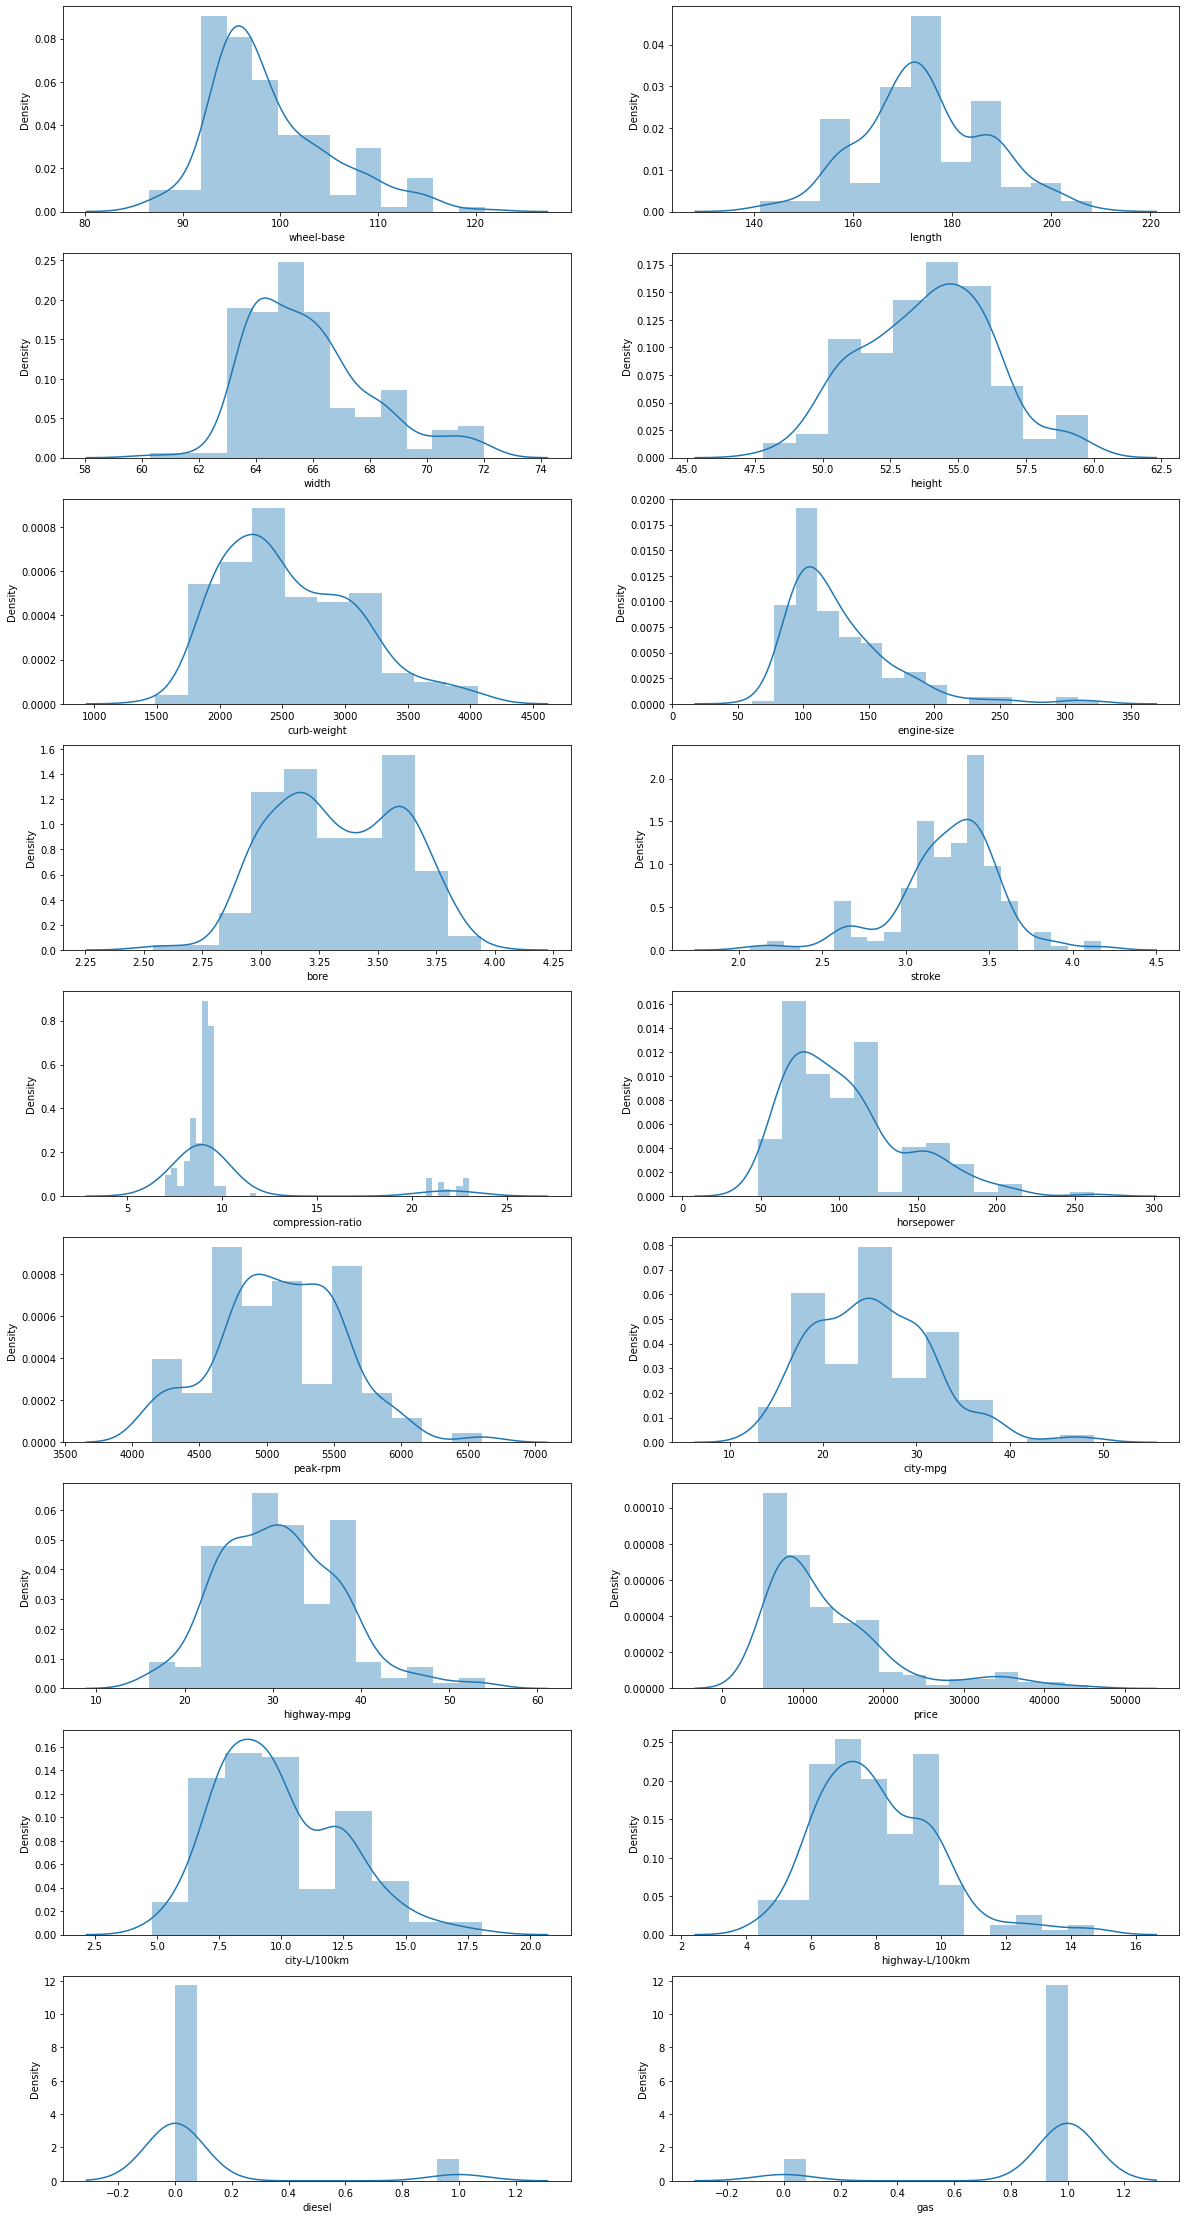

In [16]:
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 40))

for i in range(len(all_col)):
    plt.subplot(9, 2, i + 1)
    sns.distplot(df[all_col[i]]) 
 
plt.show()

### Boxplots

The Boxplots are also a similar way to see the distribution and statistics from the variables. It shows the median, quartiles, upper and lower limits of quartiles and outliers. The blue boxes below are supposed to be located exactly in the same place as the hills of the distribution plots. The horizontal T form attached to the blue boxes are  the upper and lower limits of the quartiles, which gives additional room for values that do not fit the mean in the dataset. If the values are above or below this limit it is classified as outliers and represented by a dot. Therefore the upper and lower limits are important to show if the variables have many outliers or not. We can see below that the following variables have outliers: 'wheel-base', 'width', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'price', 'highway-L/100km'.

Diesel and Gas are not good variable for box plot as they only have to occurances 1 or 0, not a range of numbers that show a distribution and the behavior of the variables.

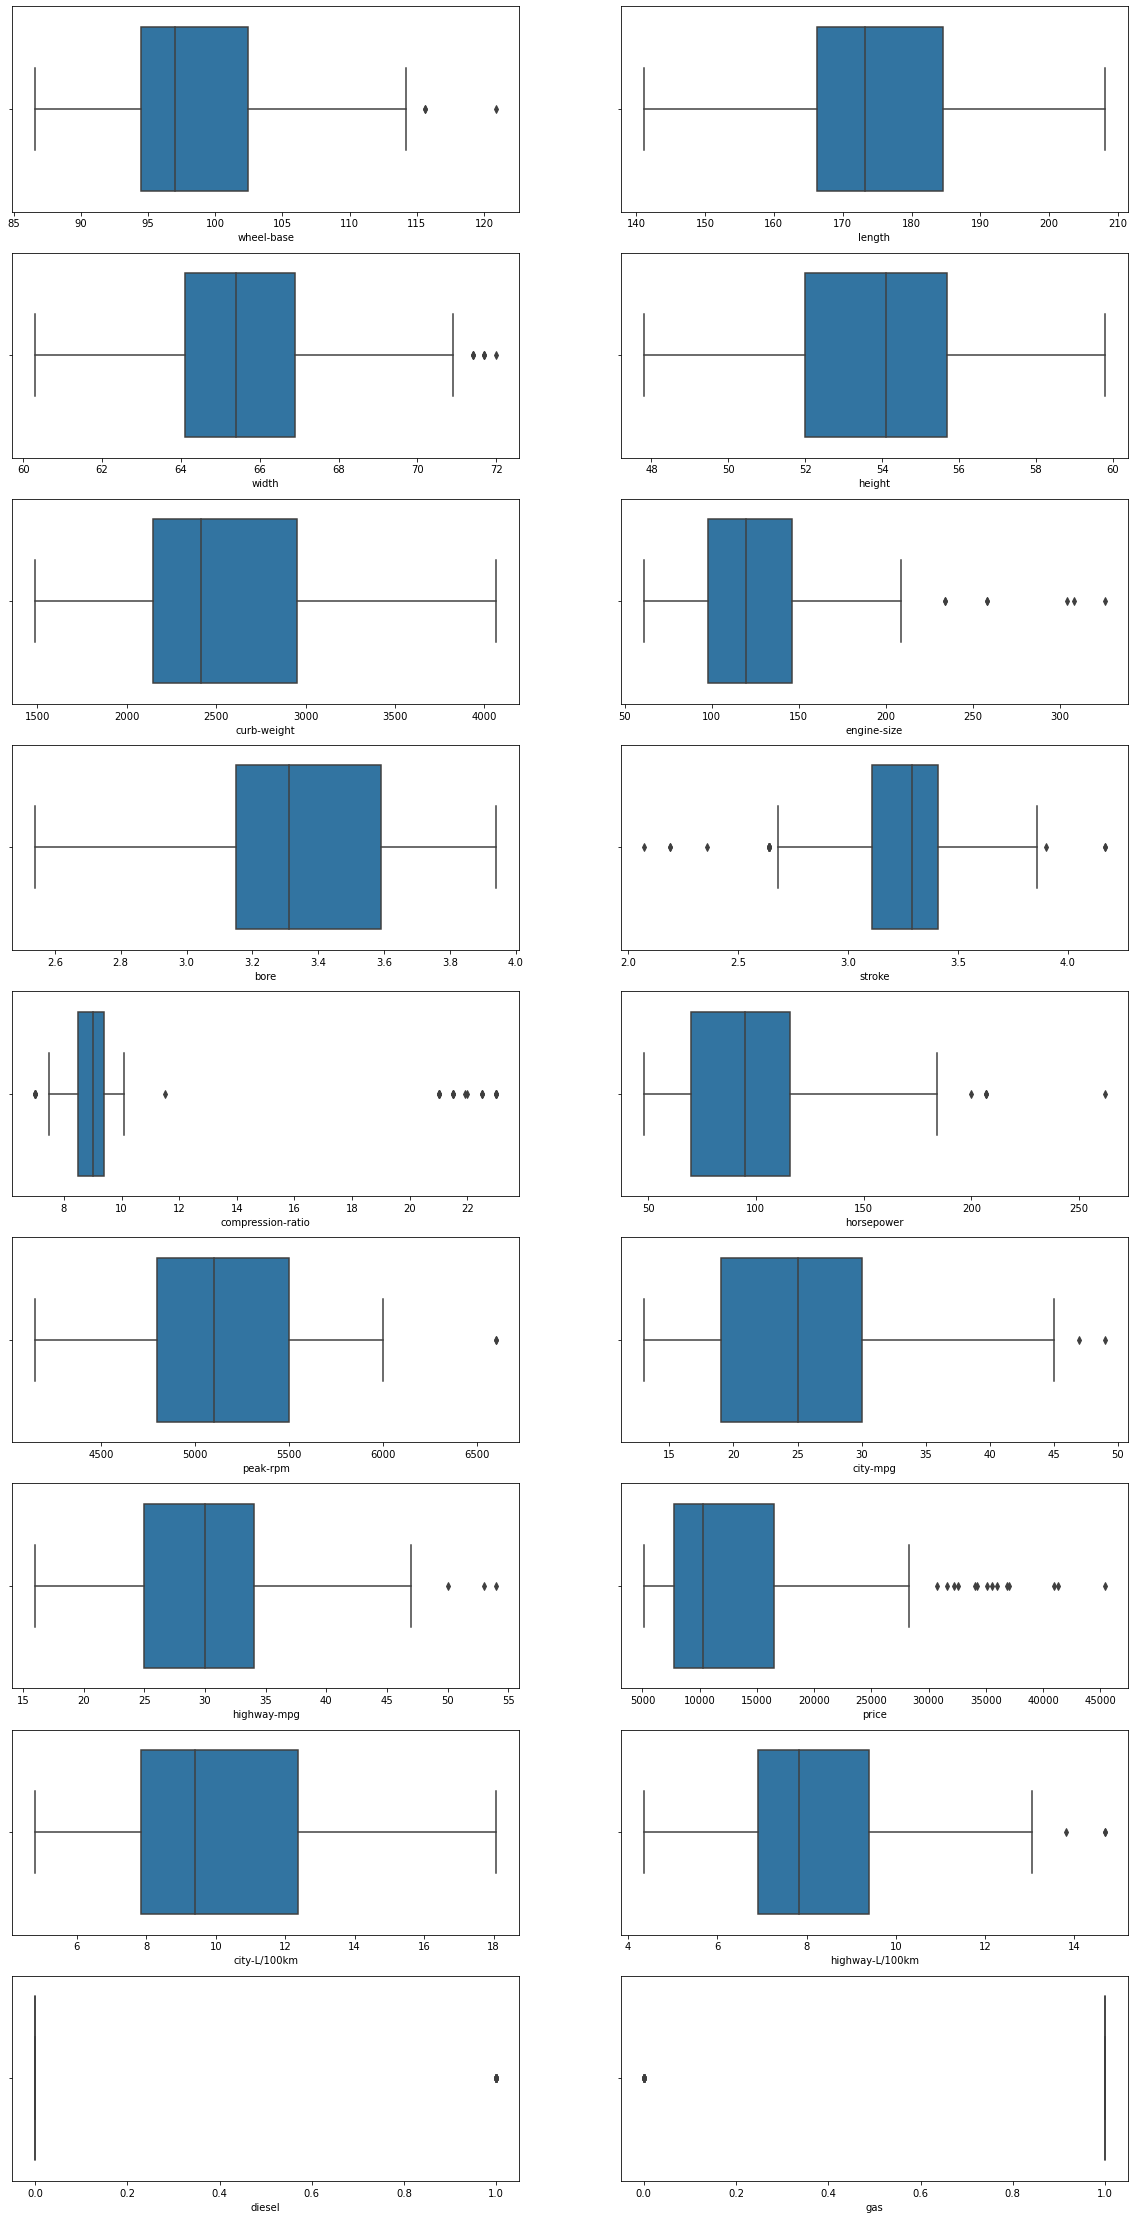

In [17]:
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 40))

for i in range(len(all_col)):
    plt.subplot(9, 2, i + 1)
    sns.boxplot(df[all_col[i]]) 
 
plt.show()

### exc

### Correlation Matrix

The Matrix shows how much two variables works towards the same goal, if one increases the other will increase too. 
Negative correlation would be the opposite, if one variable increases, the other will decrease.
The values show the proportion of this relation, if the correlation is one, the variables are perfect correlated, an increase of one point in one variable will result in the same increase for the second variable.

Correlation Matrix also shows the multicolinarity between variables, which I explained before as the ability to explain the same thing and provide extra noisy instead of valuable information.

* Correlation above 0.5 or below -0.5 are statistically relevant. 

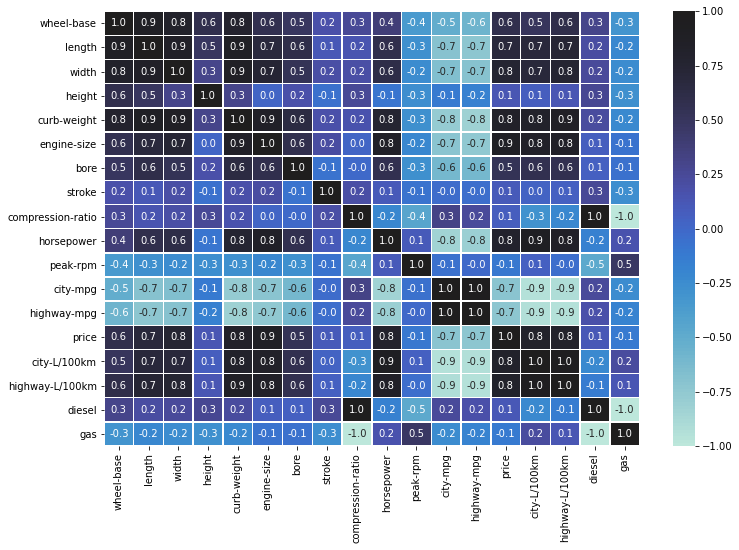

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

At this point it is necessary to take further decisions regarding the dataset in order to proceed with the model and have a more valuable output. Based on the output of the data, reduce the number of variables with a high correlation and similar background. 
* Define Price as the dependent variable of the model, since it is the information I want to calculate once all other variables are available.

* compression-ratio has a perfect correlation (1.0) with diese and negative with gas(-1.0), therefore they may explain the same thing, so will drop compression-ration.
* height has low correlation with other variables, except length and width. Since legth and width probably can explain alone the characateristics from a car, hight may be dropped. 
* No further adjustment will be considered, despite some possibilities. The model will confirm the need of some varibles anyway (p value > 0.05).

In [19]:
df = df.drop(['compression-ratio', 'height'], axis=1)

### Countplot

The countplot below shows how many occurances of the different car brands are in our data set. Toyota is by far the highest with over 30 cars from this brand, followed by nissan and mitsubishi. This may give a hint about the region where the dataset was collected -> Asia.

<AxesSubplot:xlabel='count', ylabel='make'>

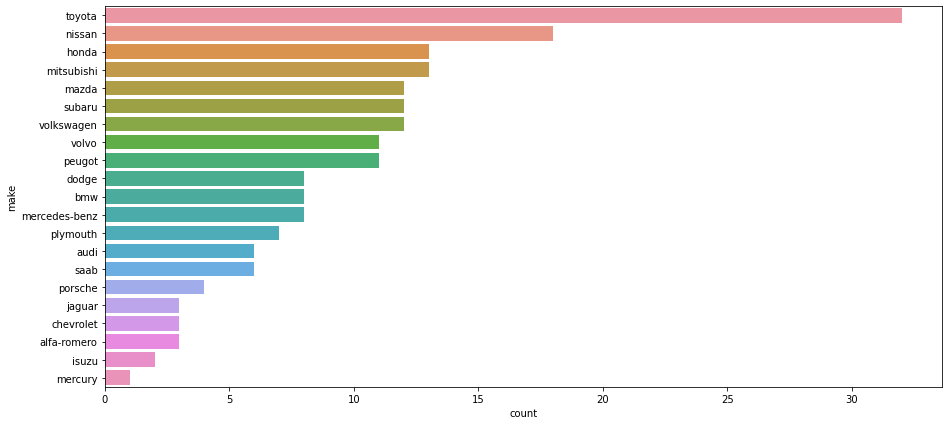

In [20]:
plt.figure(figsize=(15, 7))
sns.countplot(y="make", data=df, order=df["make"].value_counts().index)

In [21]:
df.columns

Index(['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'curb-weight',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'diesel', 'gas'],
      dtype='object')

### Scatterplot

Scatterplots can give visual confirmation of the level of correlation between variables. As we have seen from the correlation matrix above, the graphs below confirm the highest correlation between price and the variables engine size, curb weight, width.

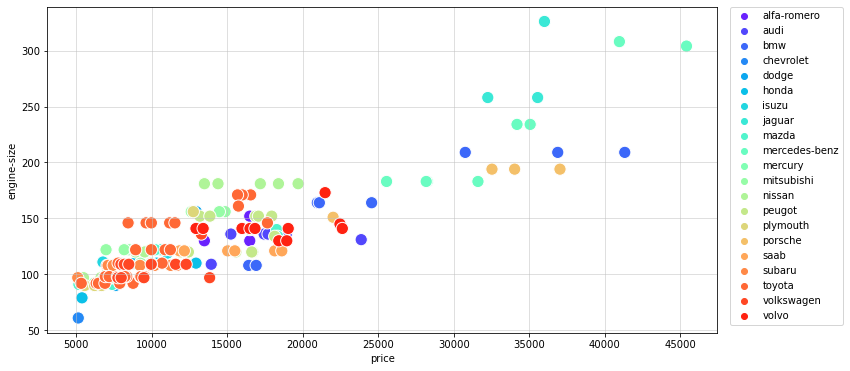

In [22]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="price", y="engine-size", data=df, hue=df['make'], palette="rainbow", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

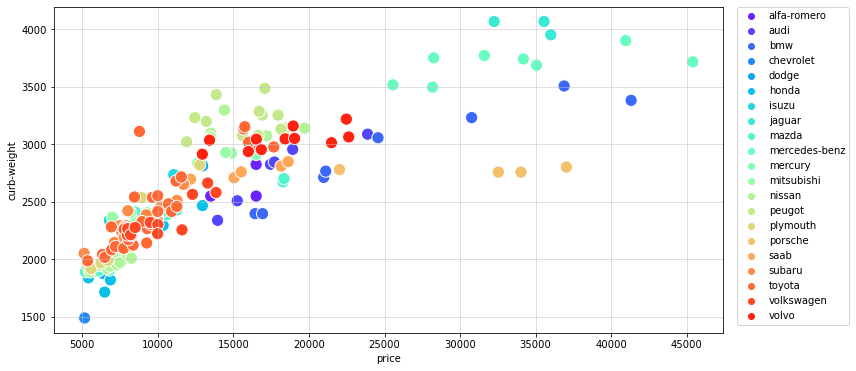

In [23]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="price", y="curb-weight", data=df, hue=df['make'], palette="rainbow", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

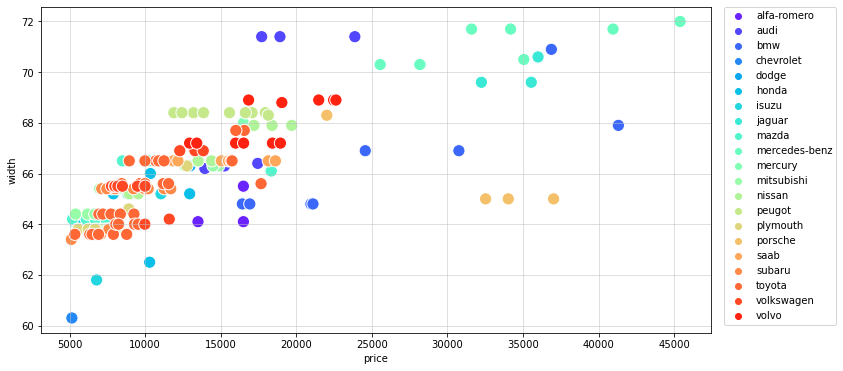

In [24]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="price", y="width", data=df, hue=df['make'], palette="rainbow", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

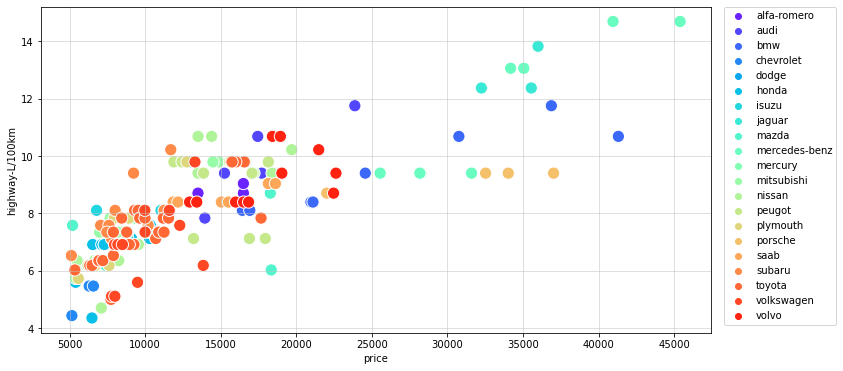

In [25]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="price", y="highway-L/100km", data=df, hue=df['make'], palette="rainbow", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### Pie Plot
Pie plots are very good at showing distributions of categorical variables. When these categorical variables have low number of categories the graph is visually clear, otherwise it may be too crowded and will not convey a message. 
Below we can see that the sedan body style is the favorite one for our dataset, followed by hatchback. Together they cover up to 80% of the dataset. Convertible and Hardtop are not that common and therefore may have more uncertainty in price predictability. 

In [26]:
df['body-style'].value_counts()

sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64

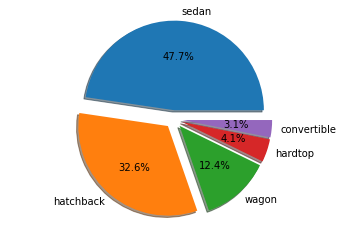

In [27]:
# Plotting a Pie Chart for marital status
labels = ['sedan','hatchback','wagon' ,'hardtop','convertible']

sizes = [df['body-style'].value_counts()[0],
         df['body-style'].value_counts()[1],
         df['body-style'].value_counts()[2],
         df['body-style'].value_counts()[3],
         df['body-style'].value_counts()[4]
        ]
explode=[0.1,0.1,0.1,0.1,0.1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax1.axis('equal')
plt.show()

### Bar Plot

The bar plot for engine type shows one category with the majority: ohc 73.1% of occurance.
This will surely influence the predictability of the model, since few data is available for others engine types, but lets wait and see if this is a relevant variable.


In [28]:
df['engine-type'].value_counts()

ohc     141
ohcf     15
ohcv     13
dohc     12
l        12
Name: engine-type, dtype: int64

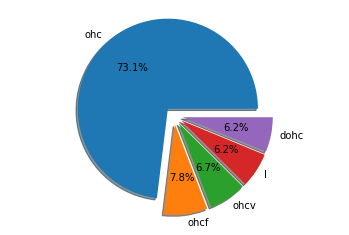

In [29]:
# Plotting a Pie Chart for marital status
labels = ['ohc','ohcf','ohcv' ,'l','dohc']

sizes = [df['engine-type'].value_counts()[0],
         df['engine-type'].value_counts()[1],
         df['engine-type'].value_counts()[2],
         df['engine-type'].value_counts()[3],
         df['engine-type'].value_counts()[4]
        ]
explode=[0.1,0.1,0.1,0.1,0.1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax1.axis('equal')
plt.show()

# Building a Linear Model:
Despite not cleaning up all variables and still considering some multicolinearity, the final dataset is ready for modelling. The categorical variables need to be transformed into dummy variables, as linear models can only predict on numerical values.


In [30]:
# IMPORT PACKAGES
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
ind_vars = df.drop(["price"], axis=1)
dep_var = df[["price"]]

In [32]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,wheel-base,length,width,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km,diesel,gas,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,130,3.47,2.68,111.0,5000.0,21,27,11.190476,8.703704,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,2.68,111.0,5000.0,21,27,11.190476,8.703704,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,3.47,154.0,5000.0,19,26,12.368421,9.038462,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,3.40,102.0,5500.0,24,30,9.791667,7.833333,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,3.40,115.0,5500.0,18,22,13.055556,10.681818,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

In [49]:
x_train.shape

(135, 59)

In [50]:
x_test.shape

(58, 59)

In [51]:
y_train.shape

(135, 1)

In [52]:
y_test.shape

(58, 1)

In [53]:
#Fit a LINEAR Regression
regression_model = LinearRegression()
lr = regression_model.fit(x_train, y_train)

In [54]:
print('R^2 of training set is ',regression_model.score(x_train, y_train))

R^2 of training set is  0.9692891429706343


In [55]:
print('R^2 of test set is',regression_model.score(x_test, y_test))

R^2 of test set is 0.71127663880563


In [56]:
va = regression_model.coef_
coeff_data = pd.DataFrame()
coeff_data['Feature'] = x_train.columns
coeff_data['Coefs'] = regression_model.coef_[0]

coeff_data = coeff_data.append({'Feature': "Intercept", 'Coefs': regression_model.intercept_}, ignore_index = True)
coeff_data

,Feature,Coefs
0,wheel-base,45.0611
1,length,-39.4936
2,width,830.21
3,curb-weight,4.31311
4,engine-size,224.598
5,bore,-15847.1
6,stroke,-2423.61
7,horsepower,-30.6631
8,peak-rpm,2.60224
9,city-mpg,353.235


In [57]:
#### Let us write the equation of the fit
Equation = "Charge ="
print(Equation, end='\t')
for i in range(0, 7):
    if(i!=6):
        print("(",coeff_data.iloc[i].Coefs,")", "*", coeff_data.iloc[i].Feature, "+", end = '  ')
    else:
        print(coeff_data.iloc[i].Coefs)

Charge =	( 45.06108924378056 ) * wheel-base +  ( -39.49355326819327 ) * length +  ( 830.2096064855644 ) * width +  ( 4.313112090631549 ) * curb-weight +  ( 224.59834581373676 ) * engine-size +  ( -15847.120037761471 ) * bore +  -2423.605197425567


In [58]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(x_train)
# Add constant to test data
x_test = sm.add_constant(x_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price"], train)
    return olsmodel.fit()


olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     53.02
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           8.80e-47
Time:                        03:07:41   Log-Likelihood:                -1171.5
No. Observations:                 135   AIC:                             2445.
Df Residuals:                      84   BIC:                             2593.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

In [59]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [60]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
print(model_perf(regression_model, x_train, y_train))

Training Performance



ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 59 is different from 60)

In [ ]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
print(model_perf(regression_model, x_test, y_test))

In [ ]:
# predictions on the test set
pred = regression_model.predict(x_test)

df = pd.DataFrame({"Actual": y_test.values.flatten(), "Predicted": pred.flatten()})
df

In [ ]:
np.random.seed(42)
df1 = df.sample(25)
df1.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()